# projet ML thème accépté


In [78]:
#importer les packages
import pandas as pd
import numpy as np
import seaborn as sns

# Dataset regression 

Real estate valuation data set Data Set


lien: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set?fbclid=IwAR0yTDnyUu7Cae-1x9aGzdMSCfmttogCWEJ_i8DA48qaW8xgL3CDS_hOUis

In [79]:
#importer la base de donnée (dataset) de type fichier excel
df1 = pd.read_excel("Real estate valuation data set.xlsx")
# vous devez télécharger ce fichier et l'uploader sur anaconda

In [80]:
df1.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [81]:
df1.tail()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [82]:
df1.shape  # 414 ligne et 8 colonne

(414, 8)

# On commence par travailler sur le dataset de type regression df1

In [83]:
df1.rename(
    columns={
        "X1 transaction date": "Transaction_Date", 
        "X2 house age": "House_Age", 
        "X3 distance to the nearest MRT station": "Distance",
        "X4 number of convenience stores": "Num_Stores_NearBy",
        "X5 latitude": "Latitude",
        "X6 longitude": "Longitude",
        "Y house price of unit area": "Target",
    },
    inplace = True
)
#renommer les attributs

In [8]:
df1.head()

,No,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
df1.shape

(414, 8)

# Normal equation (NE)

on enleve la colonne No avec la fonction drop et ajouter axis=1 pour supprimer la colonne

In [14]:
import pandas as pd
import numpy as np

dataenleverno= df1.drop('No',axis=1) #enlever la colonne No qui est en plus et pour faciliter le travail
dataenlevertarget= dataenleverno.drop('Target',axis=1)  # enlever la colonne Target pour preparer la matrice X 

dataenlevertarget= pd.DataFrame(dataenlevertarget)

display(dataenlevertarget)

arrayprepareX= dataenlevertarget.to_numpy()   # convertir la dataframe dataenlevertarget en array pour faire des opérations de numpy plus tard

X0= np.ones((414,1)) # préparer la colonne X0 qui contient que des 1  pour l'ajouter à la matrice prepare X et avoir X 
X0

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381
410,2012.666667,5.6,90.45606,9,24.97433,121.54310
411,2013.250000,18.8,390.96960,7,24.97923,121.53986
412,2013.000000,8.1,104.81010,5,24.96674,121.54067


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [15]:
dataenlevertarget.shape

(414, 6)

In [16]:
import pandas as pd
import numpy as np

X= np.append(X0, arrayprepareX , axis=1) #preparer la matrice X
X

array([[1.00000000e+00, 2.01291667e+03, 3.20000000e+01, ...,
        1.00000000e+01, 2.49829800e+01, 1.21540240e+02],
       [1.00000000e+00, 2.01291667e+03, 1.95000000e+01, ...,
        9.00000000e+00, 2.49803400e+01, 1.21539510e+02],
       [1.00000000e+00, 2.01358333e+03, 1.33000000e+01, ...,
        5.00000000e+00, 2.49874600e+01, 1.21543910e+02],
       ...,
       [1.00000000e+00, 2.01325000e+03, 1.88000000e+01, ...,
        7.00000000e+00, 2.49792300e+01, 1.21539860e+02],
       [1.00000000e+00, 2.01300000e+03, 8.10000000e+00, ...,
        5.00000000e+00, 2.49667400e+01, 1.21540670e+02],
       [1.00000000e+00, 2.01350000e+03, 6.50000000e+00, ...,
        9.00000000e+00, 2.49743300e+01, 1.21543100e+02]])

In [26]:
import pandas as pd
import numpy as np

Y = dataenleverno['Target']   # Préparer le vecteur Y de taille m=414 et 1 colonne
Y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Target, Length: 414, dtype: float64

In [27]:
Xtrps= X.T # la transosé de X 
Xtrps

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.01291667e+03, 2.01291667e+03, 2.01358333e+03, ...,
        2.01325000e+03, 2.01300000e+03, 2.01350000e+03],
       [3.20000000e+01, 1.95000000e+01, 1.33000000e+01, ...,
        1.88000000e+01, 8.10000000e+00, 6.50000000e+00],
       ...,
       [1.00000000e+01, 9.00000000e+00, 5.00000000e+00, ...,
        7.00000000e+00, 5.00000000e+00, 9.00000000e+00],
       [2.49829800e+01, 2.49803400e+01, 2.49874600e+01, ...,
        2.49792300e+01, 2.49667400e+01, 2.49743300e+01],
       [1.21540240e+02, 1.21539510e+02, 1.21543910e+02, ...,
        1.21539860e+02, 1.21540670e+02, 1.21543100e+02]])

In [28]:
xtrps_dot_X= Xtrps.dot(X)      # X X.T
xtrps_dot_X

array([[4.14000000e+02, 8.33443667e+05, 7.33300000e+03, 4.48728675e+05,
        1.69500000e+03, 1.03371784e+04, 5.03148115e+04],
       [8.33443667e+05, 1.67784628e+09, 1.47624446e+07, 9.03366612e+08,
        3.41229075e+06, 2.08102800e+07, 1.01291210e+08],
       [7.33300000e+03, 1.47624446e+07, 1.83488940e+05, 8.10028636e+06,
        3.07101000e+04, 1.83101075e+05, 8.91200633e+05],
       [4.48728675e+05, 9.03366612e+08, 8.10028636e+06, 1.14424681e+09,
        9.12091717e+05, 1.12004963e+07, 5.45290538e+07],
       [1.69500000e+03, 3.41229075e+06, 3.07101000e+04, 9.12091717e+05,
        1.05230000e+04, 4.23292113e+04, 2.06007432e+05],
       [1.03371784e+04, 2.08102800e+07, 1.83101075e+05, 1.12004963e+07,
        4.23292113e+04, 2.58109383e+05, 1.25631207e+06],
       [5.03148115e+04, 1.01291210e+08, 8.91200633e+05, 5.45290538e+07,
        2.06007432e+05, 1.25631207e+06, 6.11492825e+06]])

In [29]:
temp_1=np.linalg.inv(xtrps_dot_X)  # inv(X X.T)
temp_1

array([[ 5.85119199e+05, -5.69794948e+01, -4.51740380e-02,
        -4.08172094e-02, -1.72975746e-01, -8.98188612e+02,
        -3.68572328e+03],
       [-5.69794957e+01,  3.08947371e-02, -4.67950572e-06,
        -1.37054365e-06, -1.78176627e-04, -7.37838069e-02,
        -2.77422100e-02],
       [-4.51740369e-02, -4.67950589e-06,  1.89222965e-05,
        -1.46882500e-08, -6.30666641e-06, -1.55049788e-03,
         7.65350234e-04],
       [-4.08172092e-02, -1.37054372e-06, -1.46882499e-08,
         6.57112052e-09,  6.33334256e-07,  1.64232503e-04,
         3.24735003e-04],
       [-1.72975733e-01, -1.78176629e-04, -6.30666641e-06,
         6.33334255e-07,  4.51262588e-04, -1.25880883e-02,
         6.94099019e-03],
       [-8.98188617e+02, -7.37838078e-02, -1.55049788e-03,
         1.64232504e-04, -1.25880883e-02,  2.53150728e+01,
         3.41087077e+00],
       [-3.68572326e+03, -2.77422169e-02,  7.65350239e-04,
         3.24735003e-04,  6.94099027e-03,  3.41087072e+00,
         3.0082377

In [30]:
temp_2= Xtrps.dot(Y)  # X.T Y 
temp_2

array([1.57238000e+04, 3.16544902e+07, 2.65028290e+05, 1.22652707e+07,
       7.38280000e+04, 3.92646134e+05, 1.91101139e+06])

In [32]:
Teta = temp_1.dot(temp_2)  # INV(x X.T)* (x.T Y) = temp_1* temp_2
Teta

array([-1.44419821e+04,  5.14901703e+00, -2.69696734e-01, -4.48750827e-03,
        1.13332498e+00,  2.25470142e+02, -1.24290627e+01])

In [33]:
teta0= Teta[0]
teta1= Teta[1]
teta2= Teta[2]
teta3= Teta[3]
teta4= Teta[4]
teta5= Teta[5]
teta6= Teta[6]

print(teta0)
print(teta1)
print(teta2)
print(teta3)
print(teta4)
print(teta5)
print(teta6)



-14441.982132911682
5.149017027419177
-0.26969673445114495
-0.004487508266947771
1.1333249825001985
225.47014214843512
-12.429062716662884


In [34]:
def pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude):
    prediction_value= teta0+ teta1*Transaction_Date+ teta2*House_Age+ teta3*Distance+ teta4*Num_Stores_NearBy+ teta5*Latitude+ teta6*Longitude
    return prediction_value

In [35]:

Transaction_Date=2012.916667
House_Age= 32.0
Distance= 84.87882
Num_Stores_NearBy= 10
Latitude= 24.98298
Longitude= 121.54024

print (pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude))
#0	1	2012.916667	32.0	84.87882	10	24.98298	121.54024	37.9

47.16690649655402


In [36]:
Transaction_Date=2012.916667
House_Age= 19.5
Distance= 306.59470
Num_Stores_NearBy= 9
Latitude= 24.98034
Longitude= 121.53951

print (pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude))

#1	2	2012.916667	19.5	306.59470	9	24.98034	121.53951	42.2

47.82367089079139


In [37]:
Transaction_Date=2013.583333
House_Age= 13.3
Distance= 561.98450
Num_Stores_NearBy= 5
Latitude= 24.98746
Longitude= 121.54391

print (pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude))

#2	3	2013.583333	13.3	561.98450	5	24.98746	121.54391	47.3

48.7997609973379


In [38]:
Transaction_Date=2013.000000
House_Age= 13.7
Distance= 4082.01500
Num_Stores_NearBy= 0
Latitude= 24.94155
Longitude= 121.50381

print (pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude))

#409	2013.000000	13.7	4082.01500	0	24.94155	121.50381	15.4

14.372571061646113


# Préprocessing

## Dataset regression Real estate valuation

# 1-missing values 

Dans la description du dataset regression c'est mentionnée qu'il y a pas de missing value
et il existe une commende qui nous permet de bien détermier si oui ou non il y a des missing values qui est:

df1 .isna().sum()

In [84]:
df1.isna().sum()   # même résultat evec cette reqête : df1.isnull().sum()
# comme vous pouvez le remarquer tous les valeurs obtenues sont égales à zero par conséquent il n'y a pas de missing values

No                   0
Transaction_Date     0
House_Age            0
Distance             0
Num_Stores_NearBy    0
Latitude             0
Longitude            0
Target               0
dtype: int64

In [85]:
df1.isnull().sum()
#combien on a de valeurs manquantes (somme de valeurs nulles )

No                   0
Transaction_Date     0
House_Age            0
Distance             0
Num_Stores_NearBy    0
Latitude             0
Longitude            0
Target               0
dtype: int64

In [86]:
df1.dtypes

No                     int64
Transaction_Date     float64
House_Age            float64
Distance             float64
Num_Stores_NearBy      int64
Latitude             float64
Longitude            float64
Target               float64
dtype: object

In [87]:
df1.columns

Index(['No', 'Transaction_Date', 'House_Age', 'Distance', 'Num_Stores_NearBy',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

# 2-Enlever un  attribut non nécéessaire comme l'attribut "No"

In [88]:
df1= df1.drop('No',axis=1)
df1
# enlever aussi comme possibilité d'enlever attributs latitude et longtitude car distance suffit comme information

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


# 3- Encodage 

In [89]:
df1.dtypes  # cette commande nous permet de voir le type de nos variable et qui est de notre cas: numérique (float64 et int64), par concéquent, on a pas de variable catégorique et qui exige une encodage

Transaction_Date     float64
House_Age            float64
Distance             float64
Num_Stores_NearBy      int64
Latitude             float64
Longitude            float64
Target               float64
dtype: object

# 4- detecter outliers

In [90]:
df1.describe() # cette commande permet d'afficher les valeurs staistiques des valeurs numériques
#count --> nombre de varibles et comme on peut encore le remarquer y a pas de valeurs manquantes
#mean --> la moyenne
#std --> l'écart-type
# mais ce qui nous interesse le plus c'est la valeure minimale min et la valeure maximale max pour voir si j'ai ou non ce qu'on appelle des outliers
# par exemple pour transaction_Date on a la valeure minimale 2012.666667 et ce n'est pas une valeure négative comme -2012... pour la valeure max aussi , et meme chose pour les autres attributs. comme house_Age valeur min 0.000000


,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<AxesSubplot:xlabel='Distance'>

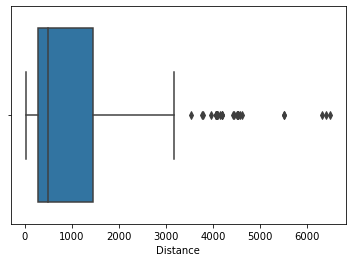

In [48]:
#boxplot pour detecter les outliers (1 ère méthode)
#sur le Target 
#sns.boxplot(x=df1['Target'])
#sns.boxplot(x=df1['Transaction_Date']) # pas de outilers
#sns.boxplot(x=df1['House_Age']) # pas de outliers
sns.boxplot(x=df1['Distance'])
#sns.boxplot(x=df1['Num_Stores_NearBy']) #pas de outliers
#sns.boxplot(x=df1['Latitude'])
#sns.boxplot(x=df1['Longitude'])



In [91]:
#2ème méthode detecter outliers , utiliser les quantiles: 
upper_lim=df1['Distance'].quantile(.95)
df1_outliers=df1[df1['Distance']>upper_lim]# définit 5% 
df1_outliers



,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
8,2013.500000,31.7,5512.038,1,24.95095,121.48458,18.8
30,2013.500000,25.9,4519.690,0,24.94826,121.49587,22.1
48,2013.416667,24.2,4605.749,0,24.94684,121.49578,13.4
49,2012.666667,29.4,4510.359,1,24.94925,121.49542,13.2
58,2013.500000,30.3,4510.359,1,24.94925,121.49542,22.6
116,2013.000000,30.9,6396.283,1,24.94375,121.47883,12.2
117,2013.000000,13.6,4197.349,0,24.93885,121.50383,13.0
170,2013.333333,24.0,4527.687,0,24.94741,121.49628,14.4
176,2012.833333,13.9,4573.779,0,24.94867,121.49507,19.2
180,2012.666667,26.9,4449.270,0,24.94898,121.49621,15.5


In [92]:
#3ème méthode detecter outliers , utiliser la méthode z_score: 
outilers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outilers.append(i)
    
    return outilers





In [93]:
detect_outliers(df1['Distance'])

[5512.038, 6396.283, 6306.153, 5512.038, 6488.021]

In [94]:
np.max(df1['Target'])

117.5

In [95]:
np.min(df1['Target'])

7.6

In [96]:

#en plus pas prendre
def scaling_feature(data):
    
    mean=np.mean(data)
    max=np.max(data)
    min=np.min(data)
    
    
    for i in data:
       data =(data-mean)/(max-min)
      
            
    
    return data

In [97]:
scaling_feature(df1['Distance'])

0     -0.16769
1     -0.16769
2     -0.16769
3     -0.16769
4     -0.16769
        ...   
409   -0.16769
410   -0.16769
411   -0.16769
412   -0.16769
413   -0.16769
Name: Distance, Length: 414, dtype: float64

# Feature scaling (normalisation ou mean normalisation) la mise à l'échelle 

In [99]:
from sklearn.preprocessing import Normalizer 
s= Normalizer()
df2 =s.fit_transform(df1)



In [100]:
import pandas as pd
import numpy as np
df2=pd.DataFrame(df2)
df2.columns= df1.columns
df2




,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,0.996909,0.015848,0.042037,0.004953,0.012373,0.060194,0.018770
1,0.986502,0.009557,0.150258,0.004411,0.012243,0.059565,0.020682
2,0.961230,0.006349,0.268276,0.002387,0.011928,0.058022,0.022580
3,0.961143,0.006349,0.268263,0.002387,0.011928,0.058019,0.026159
4,0.979676,0.002434,0.190095,0.002434,0.012158,0.059157,0.020977
...,...,...,...,...,...,...,...
409,0.442115,0.003009,0.896533,0.000000,0.005478,0.026686,0.003382
410,0.996783,0.002773,0.044799,0.004457,0.012369,0.060195,0.024763
411,0.979631,0.009148,0.190243,0.003406,0.012155,0.059140,0.019756
412,0.996413,0.004009,0.051880,0.002475,0.012358,0.060161,0.025987


In [21]:
df1

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [101]:
#en plus pas prendre  car intervalle négatif
from sklearn.preprocessing import StandardScaler  
scaler=StandardScaler()
df3=scaler.fit_transform(df1)
df3=pd.DataFrame(df3)
df3.columns= df1.columns
df3


,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,-0.824722,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,-0.824722,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,1.542244,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,1.246373,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.120593,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732
...,...,...,...,...,...,...,...
409,-0.528851,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,-1.661525
410,-1.712334,-1.064493,-0.788071,1.667503,0.427579,0.635341,0.884457
411,0.358761,0.095568,-0.549678,0.987694,0.822893,0.423972,0.192774
412,-0.528851,-0.844784,-0.776684,0.307885,-0.184755,0.476814,1.068415


In [102]:
#en plus pas prendre  car intervalle négatif
df1.columns
df2.columns= df1.columns
df2

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,0.996909,0.015848,0.042037,0.004953,0.012373,0.060194,0.018770
1,0.986502,0.009557,0.150258,0.004411,0.012243,0.059565,0.020682
2,0.961230,0.006349,0.268276,0.002387,0.011928,0.058022,0.022580
3,0.961143,0.006349,0.268263,0.002387,0.011928,0.058019,0.026159
4,0.979676,0.002434,0.190095,0.002434,0.012158,0.059157,0.020977
...,...,...,...,...,...,...,...
409,0.442115,0.003009,0.896533,0.000000,0.005478,0.026686,0.003382
410,0.996783,0.002773,0.044799,0.004457,0.012369,0.060195,0.024763
411,0.979631,0.009148,0.190243,0.003406,0.012155,0.059140,0.019756
412,0.996413,0.004009,0.051880,0.002475,0.012358,0.060161,0.025987
